# Virtual Screening

This notebook is for looking at the results from the Virtual Screening experiments

In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import tabulate

In [2]:
import sys
sys.path.append('../')


In [3]:
from bayes_vs import dummy_oracles
from bayes_vs import acquisition
from bayes_vs import querier


In [4]:
with open('../scripts/vs_results.pick', 'rb') as fo:
    data_ = pickle.load(fo)


In [5]:
print([(k, list(v.keys())) for k, v in data_.items()])

print('\n', data_['experiments']['PlainVS'].keys())

[('oracles', ['gt', 'cheap-docking', 'expensive-docking', 'FEP']), ('experiments', ['PlainVS', 'BayesVS'])]

 dict_keys(['experiment_queriers', 'stages'])


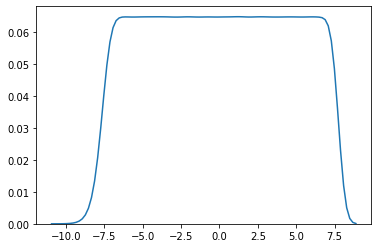

In [6]:
# We first will plot the KDE of all possible scores we can find.

all_scores = np.array(list(data_['oracles']['gt']._properties.values()))
sns.kdeplot(all_scores)

In [7]:
# We can then list the best dound by BayesVS and PlainVS 
# When run on 13.May Plain VS is doing better but not particular suprising at this stage,
# the Bayesian Regression model is not taking in that good features (ie the results of previous oracles)
# or has sensible priors. At this stage this is just to demonstrate how the process can be evaluated.

table = []

bayes_opt_scores = [elem.score for elem in data_['experiments']['BayesVS']['experiment_queriers'][-1].queries]
plain_vs_scores = [elem.score for elem in data_['experiments']['PlainVS']['experiment_queriers'][-1].queries]

for res_name, res in [('Full Dataset', all_scores), ('BayesVS', bayes_opt_scores), ('PlainVS', plain_vs_scores)]:
    indcs = [0, 1, 2, 4, 9]
    table.append([res_name] + np.sort(res)[indcs].tolist())
    
print(tabulate.tabulate(table, headers=["Method", "Top 1 Found", "Top 2 Found", "Top 3 found", "Top 5 found", "Top 10 found"]))

Method          Top 1 Found    Top 2 Found    Top 3 found    Top 5 found    Top 10 found
------------  -------------  -------------  -------------  -------------  --------------
Full Dataset       -9.79673       -9.74911       -9.74911       -9.56339        -9.43006
BayesVS            -9.6253        -9.45149       -9.44911       -8.9872         -8.62768
PlainVS            -9.6253        -9.56339       -9.45149       -9.32768        -8.90863


In [ ]:
# TODO KDE plots of the different queries.